---
Código para análise de dados do Experimento 2 de Laboratório de Física I

Feito pelo aluno

 Vinícius dos Passos de Souza, RA: 11201922119

---



**Código para cálculo de MMQ($x$,$y$,$\sigma_y$)**

In [1]:
import numpy as np
def MMQ(x,y,ey):
  #SOMA Y/ERRO^2
  s1=0
  #SOMA X/ERRO^2
  s2=0
  #SOMA 1/ERRO^2
  s3=0
  #SOMA X*Y/ERRO^2
  s4=0
  #SOMA X^2/ERRO^2
  s5=0
  for i in range(len(y)):
      s1= (y[i])/((ey[i])**2)+s1
      s2 = (x[i])/((ey[i])**2)+s2
      s3= 1/((ey[i])**2)+s3
      s4= (x[i]*y[i])/((ey[i])**2)+s4
      s5 = ((x[i])**2)/((ey[i])**2)+s5
  v=(len(y))/s3
  v1=s5/s3
  v2=s2/s3
  a = (s1*s2-s3*s4)/(s2**2-s5*s3)

  return [a,(v/((v1-v2**2)*len(y)))**0.5, 
   (s1-a*s2)/(s3),(v*v1/((v1-v2**2)*len(y)))**0.5]
#Devolve lista com (coef. angular, erro coef. angular, coef linear, erro coef linear)

Teste de função para cálculo de MMQ, se temos reta com coeficiente angular 1 e coeficiente linear 0, com pontos (0,0),(1,1),(2,2),(3,3),(4,4) e (5,5) obtemos com esse MMQ.


In [2]:
x = [0,1,2,3,4,5]
y=[0,1,2,3,4,5]



ey = np.ones(len(y))
s = MMQ(x,y,ey)
print(f'Reta: y=({s[0]}+-{round(s[1],1)})x+({s[2]}+-{round(s[3],1)})')

Reta: y=(1.0+-0.2)x+(0.0+-0.7)


Código devolveu reta com mesmo coeficiente angular e linear, com incerteza relativamente próxima

**Adicionar os 
[DADOS](https://docs.google.com/spreadsheets/d/1q-8xOw1EE0psHPJ1pSev5nO3KmDRLxQCwZuKGJqe-e0/edit?usp=sharing)**

Baixar essa planilha e adicionar para esse programa ler

In [3]:
#Adicionar excel aqui e ler ele
import pandas as pd
excel = pd.ExcelFile('Lab1_exp2.xlsx')

data = pd.read_excel(excel,'Tabela')

In [4]:
#Colocar os dados nas listas
import numpy as np
#alturas
x =np.array(data['h (m)'].values)
ex = np.array(data['eh'].values)


#tempos ao quadrado
t=data['t2'].values
et = data['e_t2'].values

#tempos medios
tm=data['t'].values
etm=data['et'].values

**Cacular coeficientes da reta feita de $h=at^2+b$**

In [5]:
#Lista com coeficientes a, ea, b ,eb
c=[0,0,0,0]

c=MMQ(t,x,ex)
print(f'Reta: h = ({round(c[0],6)}+-{round(c[1],6)})t^2+({round(c[2],3)}+-{round(c[3],3)})')
print('---------------------------')
for i in range(len(x)):
  print(f' \({round(x[i],3)}+-{round(ex[i],3)}\)& \({round(t[i],2)}+-{round(et[i],2)}\) \\\ ')

Reta: h = (0.012885+-8.3e-05)t^2+(0.002+-0.002)
---------------------------
 \(0.1+-0.001\)& \(7.63+-0.05\) \\ 
 \(0.15+-0.001\)& \(11.51+-0.04\) \\ 
 \(0.2+-0.001\)& \(15.35+-0.05\) \\ 
 \(0.25+-0.001\)& \(19.23+-0.06\) \\ 
 \(0.3+-0.001\)& \(23.11+-0.08\) \\ 
 \(0.35+-0.001\)& \(27.05+-0.06\) \\ 


**Plotar gráfico de $h$ $(m)$ VS $t^2$ $(s^2)$**

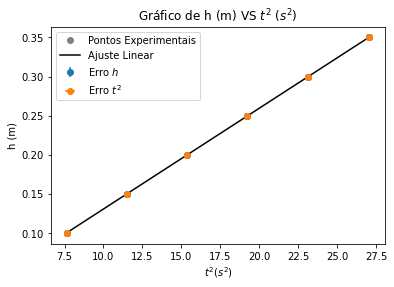

In [6]:
import matplotlib.pyplot as plt


#plot dos pontos
plt.plot(t,x,'o',color = 'gray', label = 'Pontos Experimentais')
#plot das retas
plt.plot(t,t*c[0]+c[2],'-',color = 'black',label = 'Ajuste Linear ')

#plot errorbar
#colcoar legenda da error bar
plt.errorbar(t,x,yerr = ex,fmt='o',label = 'Erro $h$')
plt.errorbar(t,x,xerr=et,fmt='o',label = 'Erro $t^2$')

#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#tirar se n quiser legenda
plt.legend()

#plt.ylim([0,0.9]) #arruma tamanho eixo y
#plt.xlim([0,6]) #arrumar tamanho eixo x

plt.title('Gráfico de h (m) VS $t^2$ $(s^2)$')
plt.xlabel('$t^2$($s^2$)')
plt.ylabel('h (m)')
plt.show()

**Adicionar Massa da roda $m$ e raios , $r$ e $R$**

In [32]:
g=9.8
#MASSA EM Kg
m=0.50929 #massa original do corpo suspenso
em=0.00001 #erro da massa original do corpo suspenso

#Raios em m
R=0.06405
eR=0.00003

R_i =0.04925

r=0.00250
er=0.00003

#Calcular momento de inércia
I = 1/2*m*(R**2+R_i**2)
eI = 1/2*np.sqrt((R**2*em)**2+(2*m*R*eR)**2)

print(f'I=({round(I,7)*1000}+-{round(eI,7)*1000})Kg m^2')

I=(1.6623+-0.001)Kg m^2


**Com modelo teórico temos que**

$A = \frac{1}{2}\frac{mr^2}{mr^2+I}g$ $\implies$ $I = mr^2 \left ( \frac{1}{2A}g-1 \right )$

$\sigma_I = \pm \sqrt{ r^4 \sigma_m^2\left( \frac{1}{2A}g-1\right)^2 +\left(2mr \sigma_r \left ( \frac{1}{2A}g-1 \right ) \right)^2 + \left( mr^2 \sigma_A \frac{1}{A^2}g \right)^2 }$

In [44]:
#momento de inércia com ajuste linear
IA= m*r**2 * (g/(2*c[0])-1)
e_IA = np.sqrt(r**4*em**2*(g/(2*c[0])-1)**2+4*m**2*r**2*er**2*(g/(2*c[0])-1)**2+(m*r**2*c[1]*g/(c[0]**2))**2)

print(f'I_ajuste = ({round(IA,6)*1000}+- {round(e_IA,6)*1000})Kg m^2')
print(f'Desvio percentual {1-IA/I}\%')

I_ajuste = (1.2069999999999999+- 0.033)Kg m^2
Desvio percentual 0.2737083640665595\%


---
---
---
**Obter as Velocidade**

$v=2At_m \implies \sigma_v = \pm 2\sqrt{ \left (  \sigma_{A}t_m \right )^2 + \left ( A \sigma_{t_m}\right )^2}$

**Obter angulares**

$\omega = \frac{v}{r} \implies \sigma_{\omega}=\pm \sqrt{ \left (\frac{\sigma_v}{r} \right )^2+  \left ( \frac{\sigma_r v }{r^2} \right )^2} $

In [45]:
#velocidades lineares
v=np.ones(len(t))
ev=np.ones(len(t))

#velocidades angulares
w = np.ones(len(t))
ew = np.ones(len(t))

for i in range(len(t)):
  #um
  v[i]=2*c[0]*tm[i]
  ev[i]= 2*np.sqrt((c[1]*tm[i])**2+(c[0]*etm[i]**2))
  # outro
  w[i]=v[i]/r
  ew[i] = np.sqrt( (ev[i]/r)**2 +(er*v[i]/(r**2))**2 )
  
  print(f'\({round(v[i],4)} \pm {round(ev[i],4)}\) & \( {round(w[i],1)}\pm{round(ew[i],1)}\) \\\ ') #printe se quiser fazer tabela 

\(0.0712 \pm 0.0008\) & \( 28.5\pm0.5\) \\ 
\(0.0874 \pm 0.0007\) & \( 35.0\pm0.5\) \\ 
\(0.1009 \pm 0.0007\) & \( 40.4\pm0.6\) \\ 
\(0.113 \pm 0.0008\) & \( 45.2\pm0.6\) \\ 
\(0.1239 \pm 0.0009\) & \( 49.5\pm0.7\) \\ 
\(0.134 \pm 0.0009\) & \( 53.6\pm0.7\) \\ 


**calcular energias**

$E_{pi} = mgh \implies \sigma_{E_p} = \pm g\sqrt{(\sigma_mh_i)^2 + (\sigma_hm)^2}$, sendo h a altura que a roda está do sensor.

$E_{ti} = \frac{1}{2}mv^2  \implies \sigma_{E_t} = \pm \frac{1}{2}\sqrt{(v^2\sigma_m)^2+(2mv \sigma_v)^2}$

$E_{ri} = \frac{1}{2}I \omega^2 \implies \sigma_{E_r} = \pm \frac{1}{2} \sqrt{(\omega^2\sigma_I)^2+(2m\omega \sigma_{\omega})^2}$

In [47]:
#energias 
Ep = np.ones(len(x))
eEp = np.ones(len(x))
Et = np.ones(len(x))
eEt= np.ones(len(x))
Er= np.ones(len(x))
eEr = np.ones(len(x))

Em = np.ones(len(x))
eEm = np.ones(len(x))

for i in range(len(x)):
  #potencial
  Ep[i] = m*g*(x[i])
  eEp[i] = g* np.sqrt((em*x[i])**2+(ex[i]*m)**2)
  #transla
  Et[i] = m/2 * v[i]**2
  eEt[i] = 1/2* np.sqrt((v[i]**2*em)**2+(2*m*v[i]*ev[i])**2)
  #rotacional
  Er[i] = IA/2*w[i]**2
  eEr[i] = 1/2* np.sqrt((w[i]**2*e_IA)**2+(2*IA*w[i]*ew[i])**2)
  #energia sistema
  Em[i] = -Ep[i]+Et[i]+Er[i]
  eEm[i] = np.sqrt(eEp[i]**2+eEt[i]**2+eEr[i]**2) 

  print(f'\({round(Ep[i],3)} \pm {round(eEp[i],3)} \) & \({round(Et[i],6)}\pm{round(eEt[i],6)}\) & \({round(Er[i],2)}\pm {round(eEr[i],2)}) \) & \({round(Em[i],3)}\pm{round(eEm[i],3)} \) \\\ ')#ajudar a printar tabela

\(0.499 \pm 0.007 \) & \(0.00129\pm3e-05\) & \(0.49\pm 0.02) \) & \(-0.009\pm0.022 \) \\ 
\(0.749 \pm 0.007 \) & \(0.001946\pm3e-05\) & \(0.74\pm 0.03) \) & \(-0.009\pm0.03 \) \\ 
\(0.998 \pm 0.007 \) & \(0.002595\pm3.8e-05\) & \(0.98\pm 0.04) \) & \(-0.011\pm0.039 \) \\ 
\(1.248 \pm 0.007 \) & \(0.003252\pm4.6e-05\) & \(1.23\pm 0.05) \) & \(-0.011\pm0.049 \) \\ 
\(1.497 \pm 0.007 \) & \(0.003907\pm5.6e-05\) & \(1.48\pm 0.06) \) & \(-0.011\pm0.058 \) \\ 
\(1.747 \pm 0.007 \) & \(0.004575\pm6.1e-05\) & \(1.74\pm 0.07) \) & \(-0.007\pm0.067 \) \\ 


**Plotar Gráfico das Energias**

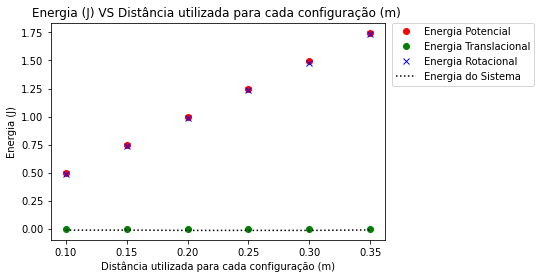

In [48]:
plt.plot(x,Ep,'o',color = 'red',label='Energia Potencial')
plt.plot(x,Et,'o',color = 'green',label='Energia Translacional')
plt.plot(x,Er,'x',color = 'blue',label='Energia Rotacional')
plt.plot(x,Em,':',color = 'black',label='Energia do Sistema')

#plotar error bar
#plt.errorbar(tm, Ep,yerr=eEp,xerr=etm,fmt='o')
#plt.errorbar(tm, Et, yerr=eEt,xerr=etm,fmt='o')        
#plt.errorbar(tm, Er, yerr=eEr,xerr=etm,fmt='o')  

#plt.ylim([0,0.75])
#plt.xlim([-0.0005,0.0708])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#tirar se n quiser legenda
plt.title('Energia (J) VS Distância utilizada para cada configuração (m) ')
plt.ylabel('Energia (J)')
plt.xlabel('Distância utilizada para cada configuração (m)')
plt.show()

**O gráfico a seguir foi construido tentando mostrar como a energia cinética vira potencial. Para este foi considerado como origem o ponto a uma altura\(h=0.35m\) do centro da Roda de Maxwell**

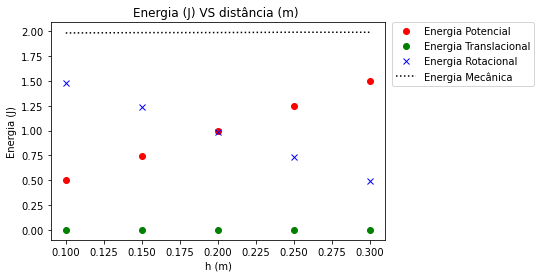

In [49]:
x2 = np.array([0.1,0.15,0.20,0.25,0.30])
v2 = np.array([0.1239,0.113,0.10009,0.0874,0.0712])
w2=np.array([49.5,45.2,40.4,35,28.5])
Em2 = np.ones(len(x2))
Ep2 = np.ones(len(x2))
Et2 = np.ones(len(x2))
Er2 = np.ones(len(x2))
for i in range(len(x2)):
    Ep2[i]=m*g*x2[i]
    Et2[i]=m/2*v2[i]**2
    Er2[i]=IA/2*w2[i]**2
    Em2[i] = Ep2[i]+Et2[i]+Er2[i]
    
plt.plot(x2,Ep2,'o',color = 'red',label='Energia Potencial')
plt.plot(x2,Et2,'o',color = 'green',label='Energia Translacional')
plt.plot(x2,Er2,'x',color = 'blue',label='Energia Rotacional')
plt.plot(x2,Em2,':',color = 'black',label='Energia Mecânica')

#plotar error bar
#plt.errorbar(tm, Ep,yerr=eEp,xerr=etm,fmt='o')
#plt.errorbar(tm, Et, yerr=eEt,xerr=etm,fmt='o')        
#plt.errorbar(tm, Er, yerr=eEr,xerr=etm,fmt='o')  

#plt.ylim([0,0.75])
#plt.xlim([-0.0005,0.0708])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#tirar se n quiser legenda
plt.title('Energia (J) VS distância (m) ')
plt.ylabel('Energia (J)')
plt.xlabel('h (m)')
plt.show()


In [52]:
for i in range(len(x2)):
    print(f' \({x2[i]} \) & \({Ep2[i]}\)& \( {Et2[i]}\)& \({Er2[i]}\)&\({Em2[i]}\) \\\ ')


 \(0.1 \) & \(0.49910420000000005\)& \( 0.00390910887045\)& \(1.4791234261302177\)&\(1.9821367350006678\) \\ 
 \(0.15 \) & \(0.7486563\)& \( 0.0032515620050000004\)& \(1.2333061216288461\)&\(1.9852139836338463\) \\ 
 \(0.2 \) & \(0.9982084000000001\)& \( 0.0025510356726245\)& \(0.9852733766728685\)&\(1.9860328123454931\) \\ 
 \(0.25 \) & \(1.2477605\)& \( 0.0019451720402000004\)& \(0.7394862552839575\)&\(1.9891919273241574\) \\ 
 \(0.3 \) & \(1.4973126\)& \( 0.0012909075488\)& \(0.4903246619219547\)&\(1.9889281694707548\) \\ 
